# 📊 Análise Exploratória de Dados (EDA)
## Sistema de Vendas de Carros Esportivos

**Objetivo:** Explorar e entender os dados de vendas, identificar padrões, tendências e insights de negócio.

---

## 1. Setup e Importações

In [1]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurar pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)

# Tamanho padrão dos gráficos
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Bibliotecas importadas com sucesso!")
print(f"📅 Data da análise: {datetime.now().strftime('%d/%m/%Y %H:%M')}")

✅ Bibliotecas importadas com sucesso!
📅 Data da análise: 24/10/2025 14:19


## 2. Conexão com o Banco de Dados

In [5]:
# Conectar ao banco SQLite
DB_PATH = './vendas_carros_esportivos.db'

try:
    conn = sqlite3.connect(DB_PATH)
    print(f"✅ Conectado ao banco: {DB_PATH}")
    
    # Verificar tabelas
    tabelas = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)
    print(f"\n📊 Tabelas disponíveis:")
    for tabela in tabelas['name']:
        if tabela != 'sqlite_sequence':
            count = pd.read_sql(f"SELECT COUNT(*) as count FROM {tabela}", conn)['count'][0]
            print(f"   • {tabela}: {count:,} registros")
            
except Exception as e:
    print(f"❌ Erro ao conectar: {e}")

✅ Conectado ao banco: ./vendas_carros_esportivos.db

📊 Tabelas disponíveis:
   • clientes: 1,977 registros
   • vendedores: 15 registros
   • veiculos: 38 registros
   • vendas: 1,500 registros
   • test_drives: 3,000 registros
   • servicos_pos_venda: 800 registros


## 3. Carregamento dos Dados

In [6]:
# Query principal - dados de vendas completos
query_vendas = """
SELECT 
    v.*,
    c.nome as cliente_nome,
    CAST((julianday('now') - julianday(c.data_nascimento)) / 365.25 AS INTEGER) as idade_cliente,
    c.genero,
    c.cidade,
    c.estado,
    c.renda_anual,
    c.profissao,
    ve.marca,
    ve.modelo,
    ve.ano_fabricacao,
    ve.potencia_cv,
    ve.cilindradas,
    ve.categoria,
    ve.preco_base,
    vd.nome as vendedor_nome,
    vd.comissao_percentual
FROM vendas v
JOIN clientes c ON v.cliente_id = c.cliente_id
JOIN veiculos ve ON v.veiculo_id = ve.veiculo_id
JOIN vendedores vd ON v.vendedor_id = vd.vendedor_id
WHERE v.status_venda = 'Concluída'
"""

df_vendas = pd.read_sql(query_vendas, conn)

print(f"✅ Dados carregados: {len(df_vendas):,} vendas")
print(f"📊 Shape: {df_vendas.shape}")
print(f"📅 Período: {df_vendas['data_venda'].min()} a {df_vendas['data_venda'].max()}")

✅ Dados carregados: 1,393 vendas
📊 Shape: (1393, 27)
📅 Período: 2023-01-01 a 2024-12-28


## 4. Visão Geral dos Dados

In [7]:
# Primeiras linhas
print("🔍 Primeiras 5 vendas:")
df_vendas.head()

🔍 Primeiras 5 vendas:


,venda_id,cliente_id,veiculo_id,vendedor_id,data_venda,valor_venda,desconto_percentual,forma_pagamento,numero_parcelas,valor_entrada,status_venda,cliente_nome,idade_cliente,genero,cidade,estado,renda_anual,profissao,marca,modelo,ano_fabricacao,potencia_cv,cilindradas,categoria,preco_base,vendedor_nome,comissao_percentual
0,1,549,5,13,2023-06-24,1538659.37,2.21,Financiamento,60,551026.60,Concluída,Dra. Vitória Campos,49,Feminino,São Paulo,SP,995311.89,Médico,Ferrari,812 Superfast,2022,800,6.50,Gran Turismo,1573432.22,Paulo da Mota,4.99
1,4,953,32,3,2023-12-11,813801.15,5.49,Financiamento,60,310860.60,Concluída,Aylla Moura,45,Masculino,São Paulo,SP,2055289.81,Agente Esportivo,Mercedes-AMG,GT,2024,530,4.00,Esportivo,861074.12,Lucas Gabriel Souza,4.89
2,5,160,3,2,2023-08-11,954343.70,3.41,Consórcio,84,0.00,Concluída,Henrique Mendes,48,Masculino,Brasília,DF,1502407.00,Delegado,Ferrari,Roma,2022,620,3.90,Gran Turismo,988035.72,Maya Mendonça,3.07
3,6,1190,32,6,2023-02-05,797010.21,7.44,Consórcio,60,0.00,Concluída,Luiz Fernando Duarte,34,Masculino,São José dos Campos,SP,547788.12,Delegado,Mercedes-AMG,GT,2024,530,4.00,Esportivo,861074.12,Sr. Joaquim Almeida,4.76
4,7,418,37,13,2024-04-15,578431.10,6.38,À vista,1,578431.10,Concluída,João Lucas da Cunha,39,Masculino,Fortaleza,CE,1484831.52,Advogado,Audi,RS5,2025,450,2.90,Esportivo,617849.93,Paulo da Mota,4.99


In [8]:
# Informações gerais
print("📋 Informações do Dataset:")
df_vendas.info()

📋 Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   venda_id             1393 non-null   int64  
 1   cliente_id           1393 non-null   int64  
 2   veiculo_id           1393 non-null   int64  
 3   vendedor_id          1393 non-null   int64  
 4   data_venda           1393 non-null   object 
 5   valor_venda          1393 non-null   float64
 6   desconto_percentual  1393 non-null   float64
 7   forma_pagamento      1393 non-null   object 
 8   numero_parcelas      1393 non-null   int64  
 9   valor_entrada        1393 non-null   float64
 10  status_venda         1393 non-null   object 
 11  cliente_nome         1393 non-null   object 
 12  idade_cliente        1393 non-null   int64  
 13  genero               1393 non-null   object 
 14  cidade               1393 non-null   object 
 15  estado      

In [9]:
# Estatísticas descritivas
print("📊 Estatísticas Descritivas:")
df_vendas[['valor_venda', 'idade_cliente', 'renda_anual', 'potencia_cv', 'desconto_percentual']].describe()

📊 Estatísticas Descritivas:


,valor_venda,idade_cliente,renda_anual,potencia_cv,desconto_percentual
count,1393.00,1393.00,1393.00,1393.00,1393.00
mean,874956.87,43.00,1046757.32,592.31,5.59
std,329145.14,7.96,473737.71,111.02,3.70
min,347633.80,25.00,167587.60,300.00,0.00
25%,630276.48,37.00,656597.87,510.00,2.72
50%,849191.30,42.00,1028356.73,612.00,5.07
75%,1001199.80,48.00,1400393.95,650.00,7.37
max,2314597.92,67.00,2187823.65,800.00,14.94


## 5. KPIs Principais

In [10]:
# Calcular KPIs
total_vendas = len(df_vendas)
faturamento_total = df_vendas['valor_venda'].sum()
ticket_medio = df_vendas['valor_venda'].mean()
clientes_unicos = df_vendas['cliente_id'].nunique()
venda_minima = df_vendas['valor_venda'].min()
venda_maxima = df_vendas['valor_venda'].max()

print("="*60)
print("💰 KPIs PRINCIPAIS")
print("="*60)
print(f"📊 Total de Vendas: {total_vendas:,}")
print(f"💵 Faturamento Total: R$ {faturamento_total:,.2f}")
print(f"🎯 Ticket Médio: R$ {ticket_medio:,.2f}")
print(f"👥 Clientes Únicos: {clientes_unicos:,}")
print(f"📉 Venda Mínima: R$ {venda_minima:,.2f}")
print(f"📈 Venda Máxima: R$ {venda_maxima:,.2f}")
print("="*60)

💰 KPIs PRINCIPAIS
📊 Total de Vendas: 1,393
💵 Faturamento Total: R$ 1,218,814,914.83
🎯 Ticket Médio: R$ 874,956.87
👥 Clientes Únicos: 935
📉 Venda Mínima: R$ 347,633.80
📈 Venda Máxima: R$ 2,314,597.92


## 6. Análise Temporal

In [11]:
# Converter data para datetime
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])
df_vendas['ano'] = df_vendas['data_venda'].dt.year
df_vendas['mes'] = df_vendas['data_venda'].dt.month
df_vendas['ano_mes'] = df_vendas['data_venda'].dt.to_period('M')
df_vendas['trimestre'] = df_vendas['data_venda'].dt.to_period('Q')

print("✅ Variáveis temporais criadas")

✅ Variáveis temporais criadas


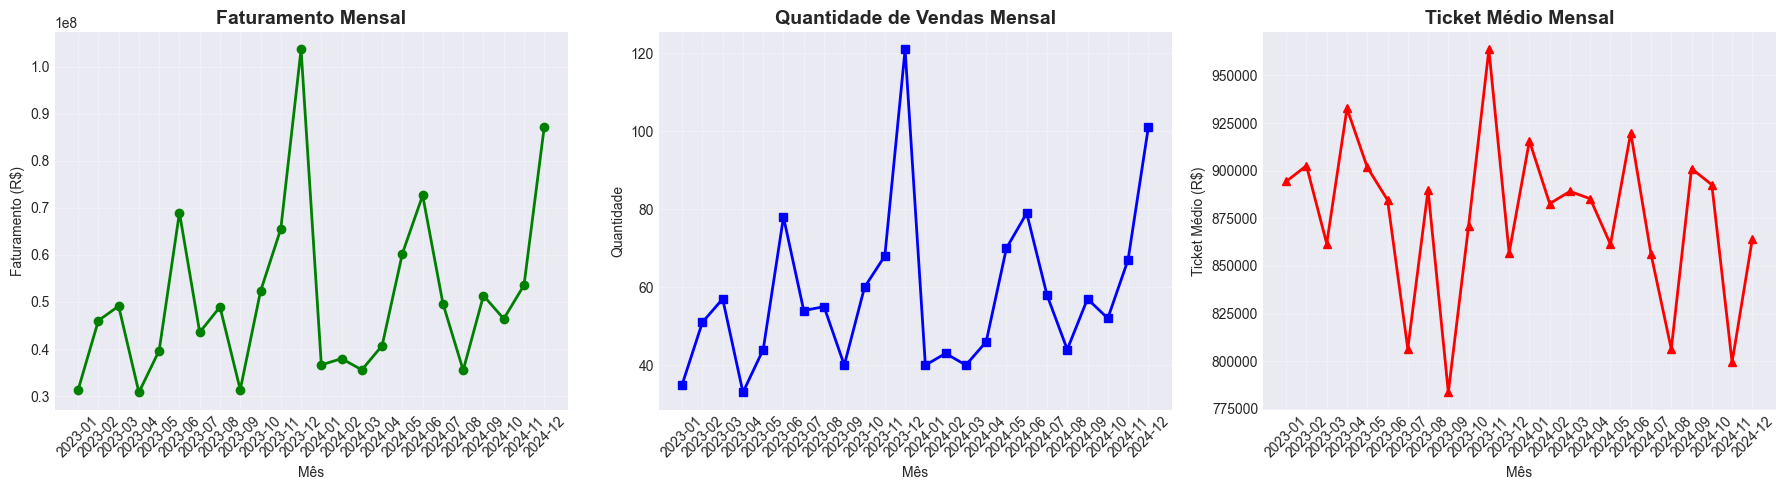


📊 Análise Temporal:
   • Mês com maior faturamento: 2023-12
   • Mês com mais vendas: 2023-12


In [12]:
# Vendas ao longo do tempo
vendas_mensais = df_vendas.groupby('ano_mes').agg({
    'venda_id': 'count',
    'valor_venda': ['sum', 'mean']
}).reset_index()

vendas_mensais.columns = ['ano_mes', 'quantidade', 'faturamento', 'ticket_medio']

# Gráfico: Evolução de vendas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Faturamento
axes[0].plot(vendas_mensais['ano_mes'].astype(str), vendas_mensais['faturamento'], 
             marker='o', color='green', linewidth=2)
axes[0].set_title('Faturamento Mensal', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Faturamento (R$)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Quantidade
axes[1].plot(vendas_mensais['ano_mes'].astype(str), vendas_mensais['quantidade'], 
             marker='s', color='blue', linewidth=2)
axes[1].set_title('Quantidade de Vendas Mensal', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Quantidade')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Ticket médio
axes[2].plot(vendas_mensais['ano_mes'].astype(str), vendas_mensais['ticket_medio'], 
             marker='^', color='red', linewidth=2)
axes[2].set_title('Ticket Médio Mensal', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Mês')
axes[2].set_ylabel('Ticket Médio (R$)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Análise Temporal:")
print(f"   • Mês com maior faturamento: {vendas_mensais.loc[vendas_mensais['faturamento'].idxmax(), 'ano_mes']}")
print(f"   • Mês com mais vendas: {vendas_mensais.loc[vendas_mensais['quantidade'].idxmax(), 'ano_mes']}")

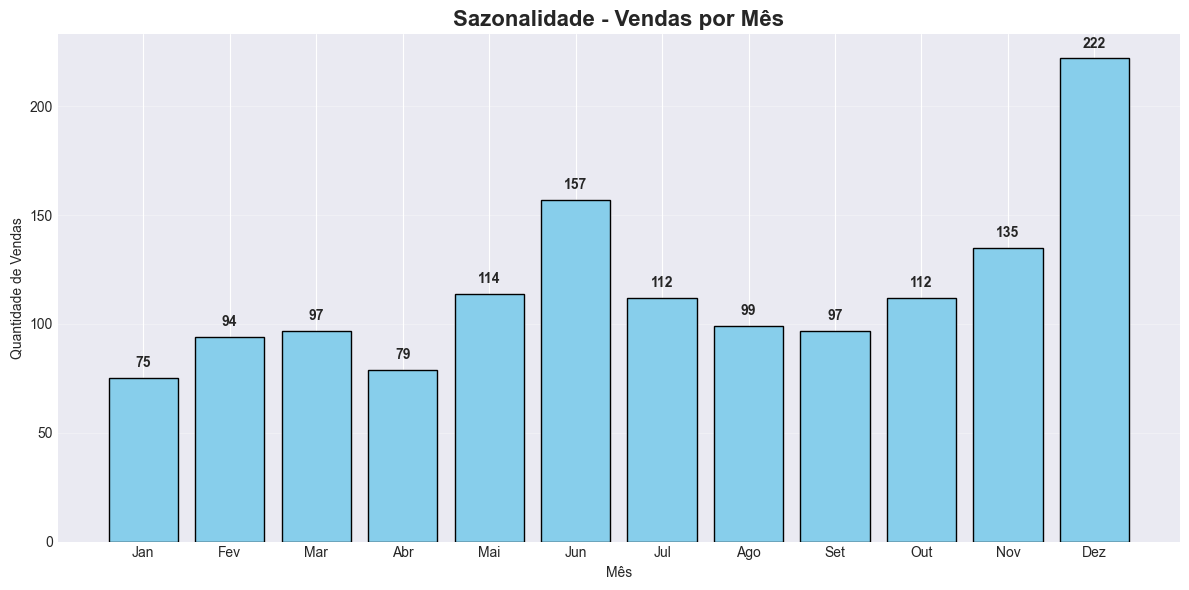


📅 Sazonalidade:
   • Mês com mais vendas: Dez (222 vendas)
   • Mês com menos vendas: Jan (75 vendas)


In [13]:
# Sazonalidade - Vendas por mês do ano
vendas_por_mes = df_vendas.groupby('mes')['venda_id'].count().reset_index()
vendas_por_mes.columns = ['mes', 'quantidade']

meses_nome = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(12, 6))
plt.bar(vendas_por_mes['mes'], vendas_por_mes['quantidade'], color='skyblue', edgecolor='black')
plt.title('Sazonalidade - Vendas por Mês', fontsize=16, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')
plt.xticks(range(1, 13), meses_nome)
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores em cima das barras
for i, v in enumerate(vendas_por_mes['quantidade']):
    plt.text(vendas_por_mes['mes'].iloc[i], v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📅 Sazonalidade:")
mes_maior = vendas_por_mes.loc[vendas_por_mes['quantidade'].idxmax(), 'mes']
mes_menor = vendas_por_mes.loc[vendas_por_mes['quantidade'].idxmin(), 'mes']
print(f"   • Mês com mais vendas: {meses_nome[mes_maior-1]} ({vendas_por_mes['quantidade'].max()} vendas)")
print(f"   • Mês com menos vendas: {meses_nome[mes_menor-1]} ({vendas_por_mes['quantidade'].min()} vendas)")

## 7. Análise de Produtos (Veículos)

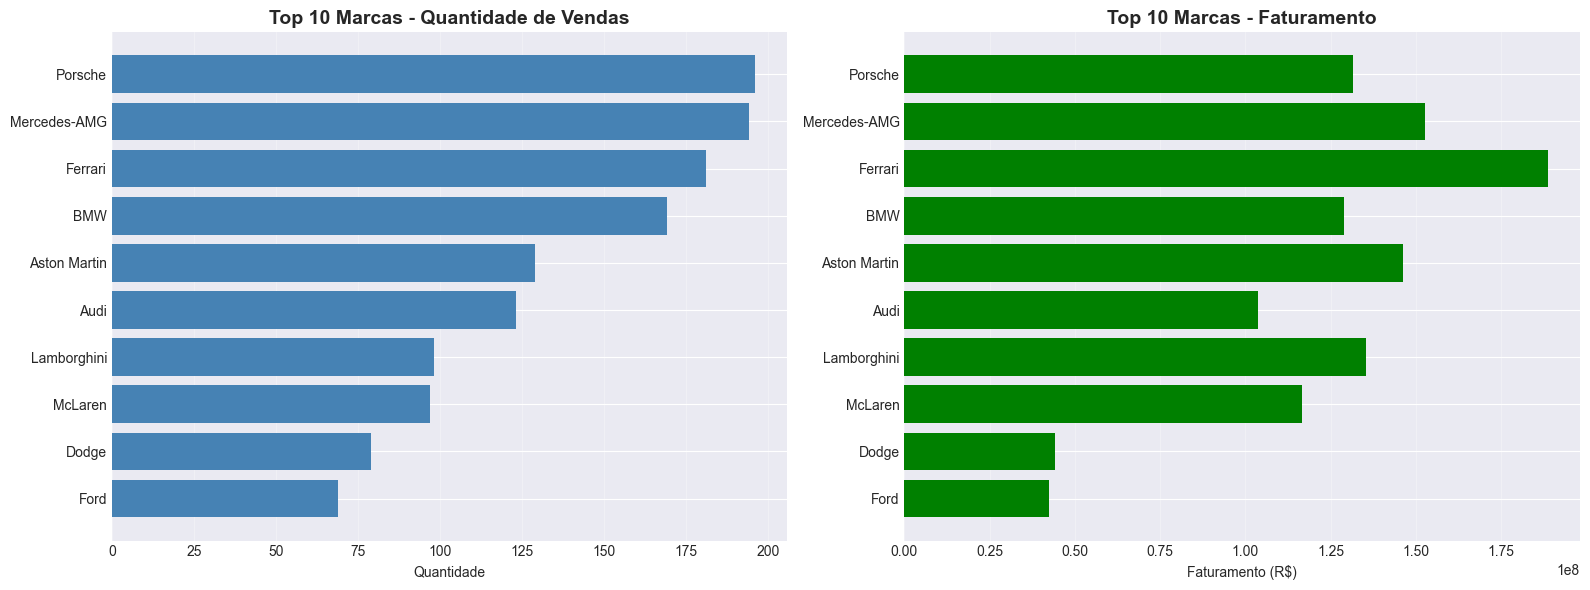


🏆 Top 3 Marcas:
   Porsche: 196 vendas (R$ 131,675,843.37)
   Mercedes-AMG: 194 vendas (R$ 152,583,844.06)
   Ferrari: 181 vendas (R$ 188,706,972.68)


In [14]:
# Top 10 marcas mais vendidas
top_marcas = df_vendas.groupby('marca').agg({
    'venda_id': 'count',
    'valor_venda': 'sum'
}).reset_index()
top_marcas.columns = ['marca', 'quantidade', 'faturamento']
top_marcas = top_marcas.sort_values('quantidade', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Quantidade
axes[0].barh(top_marcas['marca'], top_marcas['quantidade'], color='steelblue')
axes[0].set_title('Top 10 Marcas - Quantidade de Vendas', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quantidade')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Faturamento
axes[1].barh(top_marcas['marca'], top_marcas['faturamento'], color='green')
axes[1].set_title('Top 10 Marcas - Faturamento', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Faturamento (R$)')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n🏆 Top 3 Marcas:")
for idx, row in top_marcas.head(3).iterrows():
    print(f"   {row['marca']}: {row['quantidade']} vendas (R$ {row['faturamento']:,.2f})")

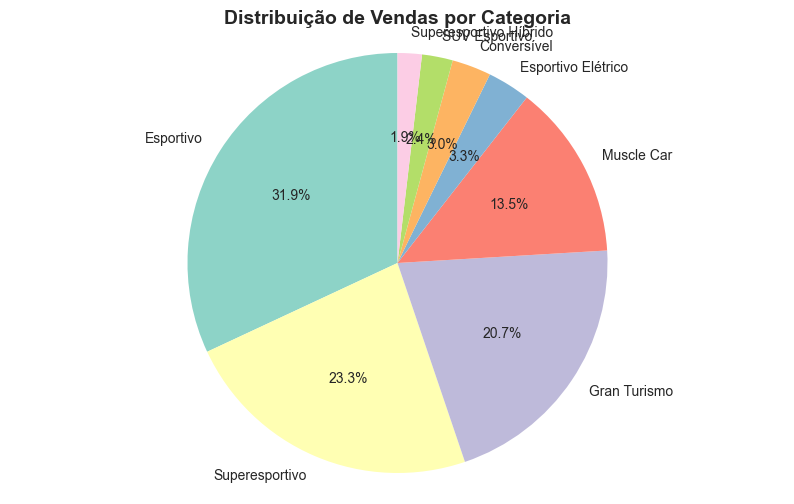


🎯 Vendas por Categoria:
             categoria  quantidade  faturamento  ticket_medio
             Esportivo         445 309683218.62     695917.35
        Superesportivo         324 385439215.73    1189627.21
          Gran Turismo         289 281260043.14     973218.14
            Muscle Car         188 106035187.45     564016.95
    Esportivo Elétrico          46  30704633.62     667492.04
           Conversível          42  28637168.68     681837.35
         SUV Esportivo          33  44280114.33    1341821.65
Superesportivo Híbrido          26  32775333.26    1260589.74


In [15]:
# Análise de categorias
vendas_categoria = df_vendas.groupby('categoria').agg({
    'venda_id': 'count',
    'valor_venda': ['sum', 'mean']
}).reset_index()
vendas_categoria.columns = ['categoria', 'quantidade', 'faturamento', 'ticket_medio']
vendas_categoria = vendas_categoria.sort_values('quantidade', ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(vendas_categoria['quantidade'], labels=vendas_categoria['categoria'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribuição de Vendas por Categoria', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

print("\n🎯 Vendas por Categoria:")
print(vendas_categoria.to_string(index=False))

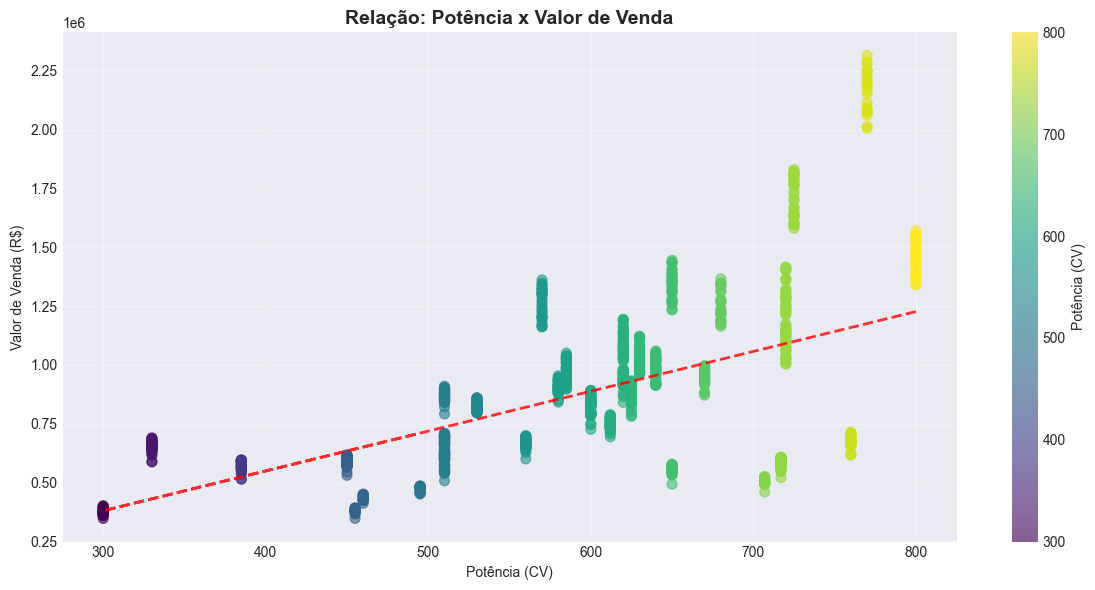


📊 Correlação Potência vs Valor: 0.571


In [16]:
# Relação Potência vs Preço
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df_vendas['potencia_cv'], df_vendas['valor_venda'], 
                     c=df_vendas['potencia_cv'], cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Potência (CV)')
plt.title('Relação: Potência x Valor de Venda', fontsize=14, fontweight='bold')
plt.xlabel('Potência (CV)')
plt.ylabel('Valor de Venda (R$)')
plt.grid(True, alpha=0.3)

# Linha de tendência
z = np.polyfit(df_vendas['potencia_cv'], df_vendas['valor_venda'], 1)
p = np.poly1d(z)
plt.plot(df_vendas['potencia_cv'], p(df_vendas['potencia_cv']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

correlacao = df_vendas['potencia_cv'].corr(df_vendas['valor_venda'])
print(f"\n📊 Correlação Potência vs Valor: {correlacao:.3f}")

## 8. Análise de Clientes

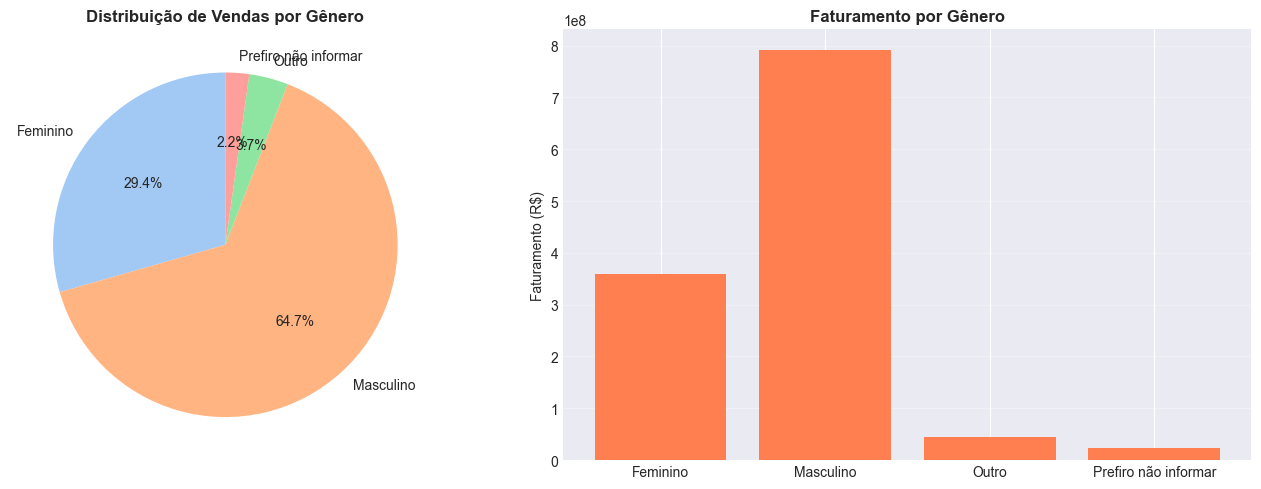

In [17]:
# Distribuição por gênero
vendas_genero = df_vendas.groupby('genero').agg({
    'venda_id': 'count',
    'valor_venda': 'sum'
}).reset_index()
vendas_genero.columns = ['genero', 'quantidade', 'faturamento']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].pie(vendas_genero['quantidade'], labels=vendas_genero['genero'], 
           autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Distribuição de Vendas por Gênero', fontweight='bold')

axes[1].bar(vendas_genero['genero'], vendas_genero['faturamento'], color='coral')
axes[1].set_title('Faturamento por Gênero', fontweight='bold')
axes[1].set_ylabel('Faturamento (R$)')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

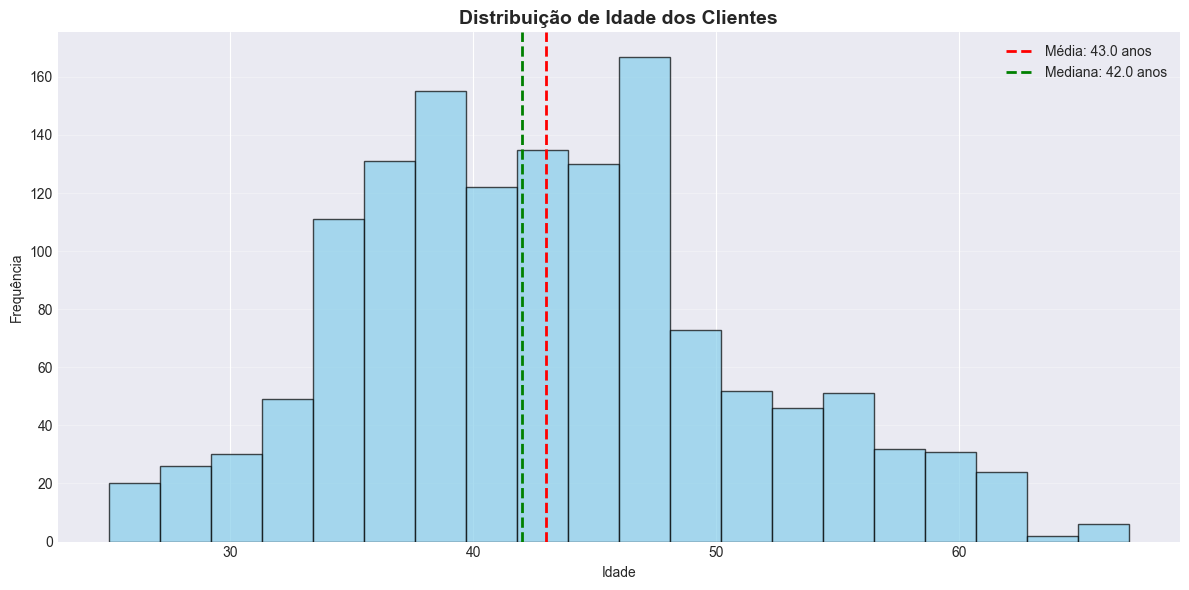


👥 Perfil Etário:
   • Média: 43.0 anos
   • Mediana: 42.0 anos
   • Mais jovem: 25 anos
   • Mais velho: 67 anos


In [18]:
# Distribuição de idade dos clientes
plt.figure(figsize=(12, 6))
plt.hist(df_vendas['idade_cliente'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_vendas['idade_cliente'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df_vendas["idade_cliente"].mean():.1f} anos')
plt.axvline(df_vendas['idade_cliente'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df_vendas["idade_cliente"].median():.1f} anos')
plt.title('Distribuição de Idade dos Clientes', fontsize=14, fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n👥 Perfil Etário:")
print(f"   • Média: {df_vendas['idade_cliente'].mean():.1f} anos")
print(f"   • Mediana: {df_vendas['idade_cliente'].median():.1f} anos")
print(f"   • Mais jovem: {df_vendas['idade_cliente'].min()} anos")
print(f"   • Mais velho: {df_vendas['idade_cliente'].max()} anos")

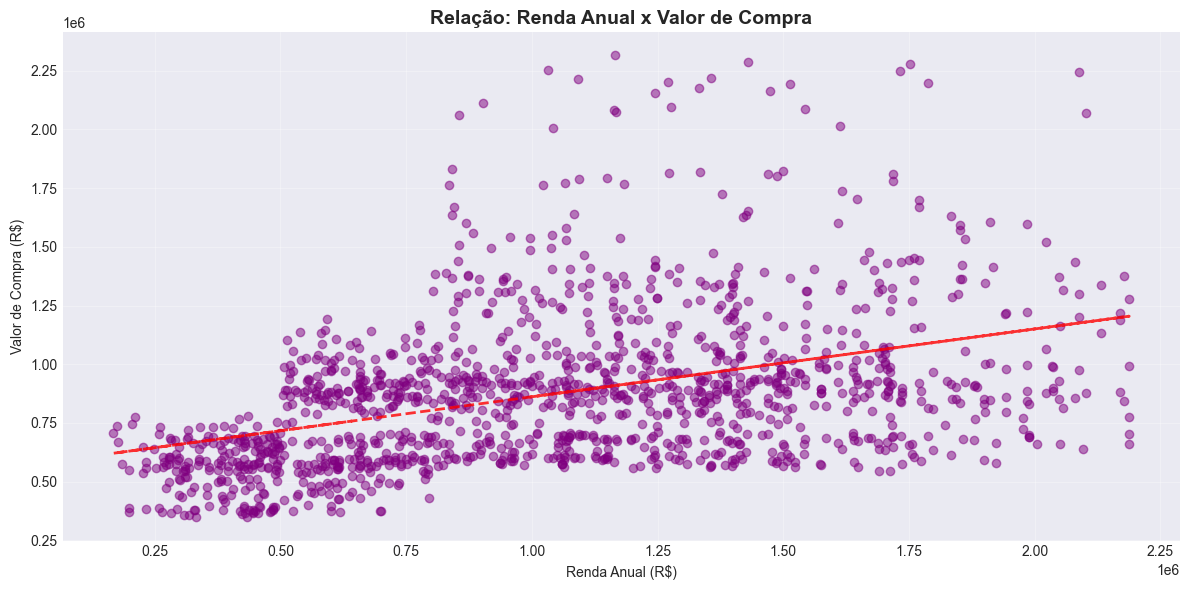


📊 Correlação Renda vs Valor de Compra: 0.416


In [19]:
# Relação Renda vs Valor de Compra
plt.figure(figsize=(12, 6))
plt.scatter(df_vendas['renda_anual'], df_vendas['valor_venda'], alpha=0.5, c='purple')
plt.title('Relação: Renda Anual x Valor de Compra', fontsize=14, fontweight='bold')
plt.xlabel('Renda Anual (R$)')
plt.ylabel('Valor de Compra (R$)')
plt.grid(True, alpha=0.3)

# Linha de tendência
z = np.polyfit(df_vendas['renda_anual'], df_vendas['valor_venda'], 1)
p = np.poly1d(z)
plt.plot(df_vendas['renda_anual'], p(df_vendas['renda_anual']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

correlacao_renda = df_vendas['renda_anual'].corr(df_vendas['valor_venda'])
print(f"\n📊 Correlação Renda vs Valor de Compra: {correlacao_renda:.3f}")

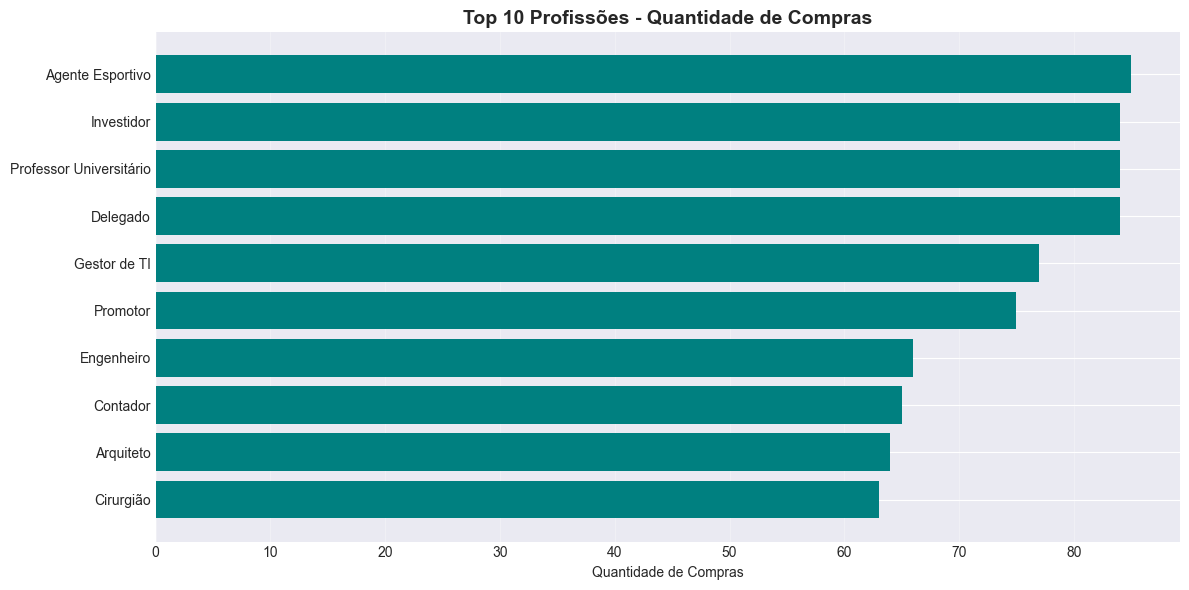

In [20]:
# Top 10 profissões
top_profissoes = df_vendas.groupby('profissao').agg({
    'venda_id': 'count',
    'valor_venda': 'mean'
}).reset_index()
top_profissoes.columns = ['profissao', 'quantidade', 'ticket_medio']
top_profissoes = top_profissoes.sort_values('quantidade', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_profissoes['profissao'], top_profissoes['quantidade'], color='teal')
plt.title('Top 10 Profissões - Quantidade de Compras', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Compras')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 9. Análise de Formas de Pagamento

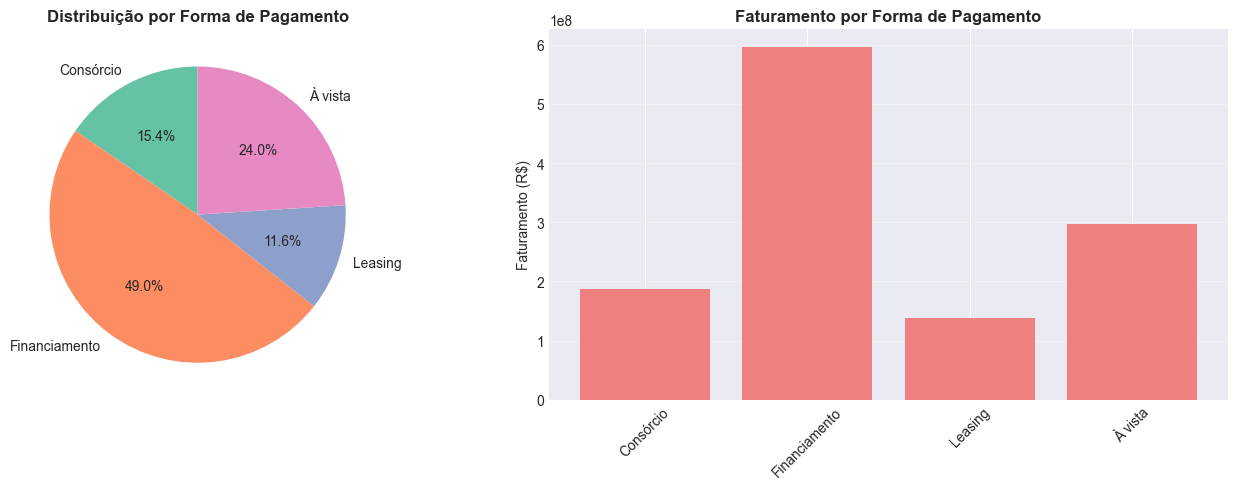


💳 Formas de Pagamento:
forma_pagamento  quantidade  faturamento  percentual
      Consórcio         215 187121761.12       15.43
  Financiamento         682 595813045.14       48.96
        Leasing         162 138203690.47       11.63
        À vista         334 297676418.10       23.98


In [21]:
# Distribuição de formas de pagamento
formas_pagto = df_vendas.groupby('forma_pagamento').agg({
    'venda_id': 'count',
    'valor_venda': 'sum'
}).reset_index()
formas_pagto.columns = ['forma_pagamento', 'quantidade', 'faturamento']
formas_pagto['percentual'] = (formas_pagto['quantidade'] / formas_pagto['quantidade'].sum() * 100).round(2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pizza - Quantidade
axes[0].pie(formas_pagto['quantidade'], labels=formas_pagto['forma_pagamento'], 
           autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
axes[0].set_title('Distribuição por Forma de Pagamento', fontweight='bold')

# Barras - Faturamento
axes[1].bar(formas_pagto['forma_pagamento'], formas_pagto['faturamento'], color='lightcoral')
axes[1].set_title('Faturamento por Forma de Pagamento', fontweight='bold')
axes[1].set_ylabel('Faturamento (R$)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💳 Formas de Pagamento:")
print(formas_pagto.to_string(index=False))

## 10. Análise de Descontos

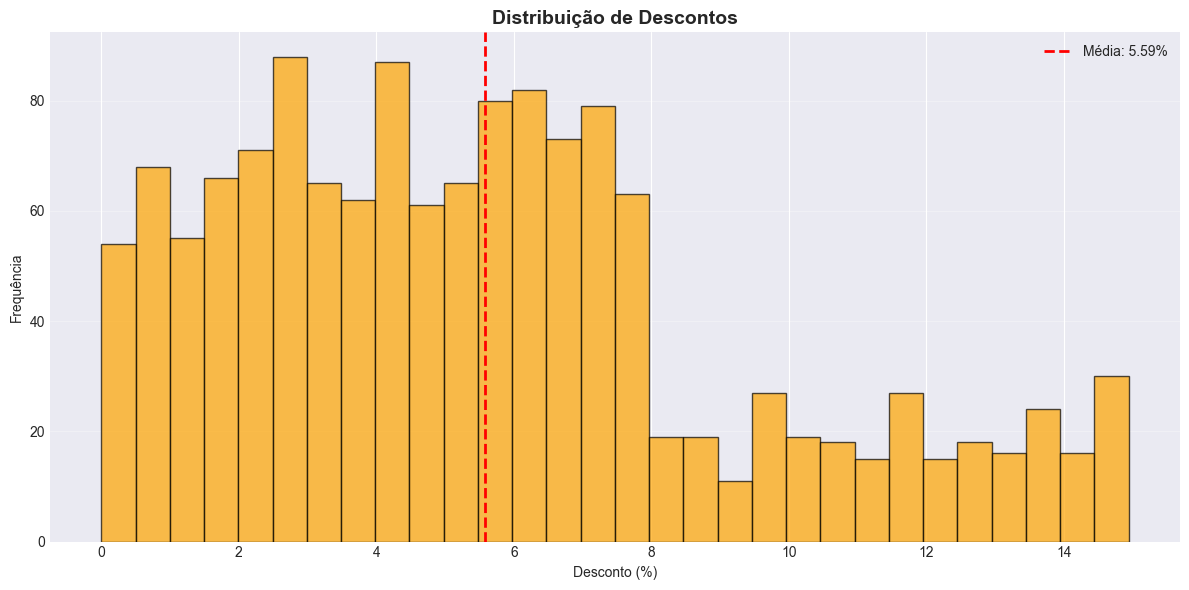


💰 Análise de Descontos:
   • Desconto médio: 5.59%
   • Desconto máximo: 14.94%
   • % vendas sem desconto: 0.1%


In [22]:
# Distribuição de descontos
plt.figure(figsize=(12, 6))
plt.hist(df_vendas['desconto_percentual'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.axvline(df_vendas['desconto_percentual'].mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Média: {df_vendas["desconto_percentual"].mean():.2f}%')
plt.title('Distribuição de Descontos', fontsize=14, fontweight='bold')
plt.xlabel('Desconto (%)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n💰 Análise de Descontos:")
print(f"   • Desconto médio: {df_vendas['desconto_percentual'].mean():.2f}%")
print(f"   • Desconto máximo: {df_vendas['desconto_percentual'].max():.2f}%")
print(f"   • % vendas sem desconto: {(df_vendas['desconto_percentual'] == 0).mean() * 100:.1f}%")

## 11. Matriz de Correlação

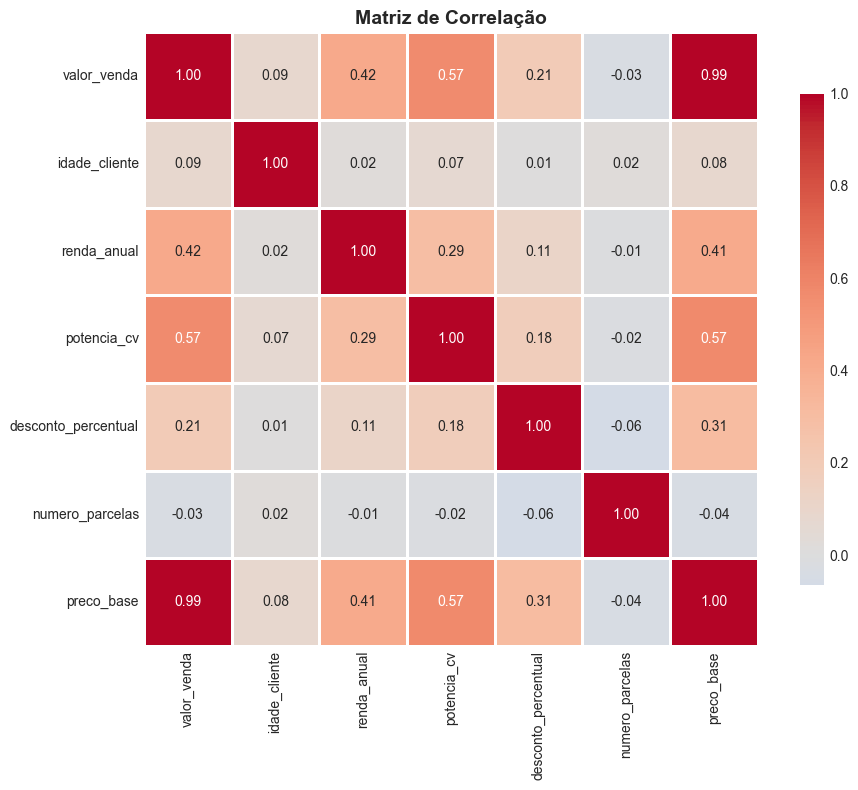


🔗 Principais Correlações com Valor de Venda:
   • preco_base: 0.993
   • potencia_cv: 0.571
   • renda_anual: 0.416
   • desconto_percentual: 0.206
   • idade_cliente: 0.089
   • numero_parcelas: -0.034


In [27]:
# Selecionar variáveis numéricas
vars_numericas = ['valor_venda', 'idade_cliente', 'renda_anual', 'potencia_cv', 
                 'desconto_percentual', 'numero_parcelas', 'preco_base']

correlacao = df_vendas[vars_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', center=0,
           square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔗 Principais Correlações com Valor de Venda:")
correlacoes_venda = correlacao['valor_venda'].sort_values(ascending=False)[1:]
for var, corr in correlacoes_venda.items():
    print(f"   • {var}: {corr:.3f}")

## 12. Insights e Conclusões

In [30]:
print("="*60)
print("🎯 PRINCIPAIS INSIGHTS")
print("="*60)
print()
print("📊 VENDAS:")
print(f"   • Total de {total_vendas:,} vendas gerando R$ {faturamento_total:,.2f}")
print(f"   • Ticket médio de R$ {ticket_medio:,.2f}")
print()
print("📅 SAZONALIDADE:")
mes_pico = meses_nome[vendas_por_mes.loc[vendas_por_mes['quantidade'].idxmax(), 'mes']-1]
print(f"   • Pico de vendas em {mes_pico}")
print(f"   • Sugestão: Intensificar marketing em meses baixos")
print()
print("🚗 PRODUTOS:")
marca_top = top_marcas.iloc[0]['marca']
print(f"   • Marca mais vendida: {marca_top}")
print(f"   • Correlação Potência x Preço:  {correlacao}")
print(f"   • Insight: Carros mais potentes custam mais")
print()
print("👥 CLIENTES:")
print(f"   • Idade média: {df_vendas['idade_cliente'].mean():.1f} anos")
print(f"   • Renda média: R$ {df_vendas['renda_anual'].mean():,.2f}")
print(f"   • Correlação Renda x Compra: {correlacao_renda:.3f}")
print(f"   • Insight: Clientes com maior renda compram carros mais caros")
print()
print("💰 FINANCEIRO:")
forma_top = formas_pagto.iloc[0]['forma_pagamento']
print(f"   • Forma de pagamento mais usada: {forma_top}")
print(f"   • Desconto médio: {df_vendas['desconto_percentual'].mean():.2f}%")
print()
print("="*60)

🎯 PRINCIPAIS INSIGHTS

📊 VENDAS:
   • Total de 1,393 vendas gerando R$ 1,218,814,914.83
   • Ticket médio de R$ 874,956.87

📅 SAZONALIDADE:
   • Pico de vendas em Dez
   • Sugestão: Intensificar marketing em meses baixos

🚗 PRODUTOS:
   • Marca mais vendida: Porsche
   • Correlação Potência x Preço:                       valor_venda  idade_cliente  renda_anual  potencia_cv  \
valor_venda                 1.00           0.09         0.42         0.57   
idade_cliente               0.09           1.00         0.02         0.07   
renda_anual                 0.42           0.02         1.00         0.29   
potencia_cv                 0.57           0.07         0.29         1.00   
desconto_percentual         0.21           0.01         0.11         0.18   
numero_parcelas            -0.03           0.02        -0.01        -0.02   
preco_base                  0.99           0.08         0.41         0.57   

                     desconto_percentual  numero_parcelas  preco_base  
valor_ven

## 13. Exportar Dados para Próxima Fase (ML)

In [33]:
# Salvar dados processados
df_vendas.to_csv('./Dados/vendas_para_ml.csv', index=False)
print("✅ Dados exportados para: data/processed/vendas_para_ml.csv")
print("🚀 Pronto para Machine Learning!")

✅ Dados exportados para: data/processed/vendas_para_ml.csv
🚀 Pronto para Machine Learning!


## 14. Fechar Conexão

In [34]:
conn.close()
print("✅ Conexão com banco fechada")

✅ Conexão com banco fechada


---
## 🎯 Próximos Passos

1. **Machine Learning Não Supervisionado**
   - Segmentação de clientes (K-Means)
   - Análise de cestas de compra
   - Redução de dimensionalidade (PCA)

2. **Machine Learning Supervisionado**
   - Previsão de valor de venda (Regressão)
   - Probabilidade de compra (Classificação)
   - Otimização de hiperparâmetros

3. **Dashboard Streamlit**
   - Visualizações interativas
   - KPIs em tempo real
   - Simulador de previsões

---